In [25]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [26]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "least_confident", "w_kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
max(runs_bp_smo['metrics.acc'])

10


0.6013

In [27]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "least_confident", "w_kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
max(runs_bp_lmo['metrics.acc'])

10


0.5896

In [28]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "least_confident", "w_kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)
max(runs_centroids['metrics.acc'])

10


0.612

In [29]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "w_kmeans",1000, 30, 0.01, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
max(runs_bp_clusterwise['metrics.acc'])

10


0.6139

In [30]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters"],[True, True, True, True, True, True, True],["boundary_points", "least_confident", "w_kmeans",1000, 0.01, 30, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary)
max(runs_boundary['metrics.acc'])

10


0.5745

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
run_ids_random = get_run_ids(runs_random)

10


In [8]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)

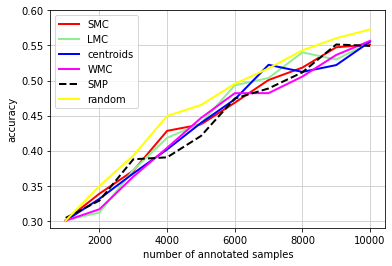

In [9]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

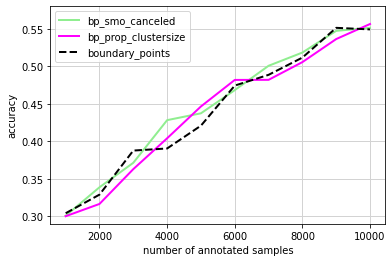

In [10]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [11]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.30071 0.33871 0.37137 0.42823 0.43738 0.46829 0.50075 0.5184  0.54736
 0.55134]
bp_lmo: [0.30091 0.31174 0.37237 0.41831 0.43871 0.49318 0.50356 0.5401  0.52985
 0.55433]


In [18]:
avg_accs_centroids

array([0.30021, 0.33136, 0.36758, 0.40178, 0.43946, 0.47313, 0.52237,
       0.51227, 0.52197, 0.55541])

In [19]:
avg_accs_clusterwise

array([0.30013, 0.31649, 0.36292, 0.40404, 0.44651, 0.48188, 0.482  ,
       0.50565, 0.53641, 0.55648])

In [20]:
avg_accs_bp_lmo

array([0.30091, 0.31174, 0.37237, 0.41831, 0.43871, 0.49318, 0.50356,
       0.5401 , 0.52985, 0.55433])

In [21]:
avg_accs_bp_smo

array([0.30071, 0.33871, 0.37137, 0.42823, 0.43738, 0.46829, 0.50075,
       0.5184 , 0.54736, 0.55134])

In [22]:
avg_accs_boundary

array([0.3041 , 0.32891, 0.38768, 0.39047, 0.4209 , 0.47433, 0.48868,
       0.51168, 0.55136, 0.54926])

In [23]:
avg_accs_random

array([0.30021, 0.34958, 0.39294, 0.44946, 0.46501, 0.49528, 0.51731,
       0.543  , 0.56033, 0.57283])